In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from joblib import dump,load

In [2]:
GDP1=pd.read_excel(r"C:\Users\iT HOME\PycharmProjects\GDP project file\GDP after dummies.xlsx")
GDP1.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Country_id
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,1,0,0,0,0,0,0,0,1
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,1,0,0,0,0,2
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,1,0,0,3
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,1,4


In [3]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square

In [17]:
y = GDP1['GDP ($ per capita)']
X = GDP1.drop(['GDP ($ per capita)',"Net migration"], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,shuffle=True)

In [19]:
rf1 = RandomForestRegressor(random_state=10, n_estimators=200)
rf1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=10)

In [20]:
rf1_pred = rf1.predict(X_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=rf1_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,985.5
54,31100.000000,31032.5
185,13300.000000,13648.0
80,20000.000000,19353.5
33,600.000000,1290.5
201,7400.000000,5282.5
37,1400.000000,4307.0
218,4800.000000,8425.0
199,1000.000000,1950.0
66,22000.000000,24267.0


In [57]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
accuracy=rf1.score(X_test,y_test)
train=rf1.score(X_train,y_train) 
results_df = pd.DataFrame(data=[["random forest perfromance",*evaluate(y_test, rf1_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Random Forest Performance:

all features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,random forest perfromance,2139.441805,1.054006e+07,3246.545107,0.870888,0.975174,0.870888


In [22]:
fi=np.array(rf1.feature_importances_)
print(fi)

[8.91983921e-03 7.28902198e-03 7.36899714e-03 2.70096180e-02
 9.19103960e-02 1.79941495e-02 6.55080904e-01 5.93134471e-03
 2.53557046e-02 5.95032892e-03 5.27929917e-03 1.43580176e-02
 7.29651672e-03 9.01070377e-02 9.05497247e-03 7.24920977e-03
 1.97313675e-04 4.51671859e-05 2.48002967e-05 2.52846502e-04
 2.76911305e-03 1.45127988e-04 4.39405482e-05 8.56053751e-04
 2.40329017e-04 1.09088730e-04 1.36360738e-03 7.79725476e-03]


<AxesSubplot:>

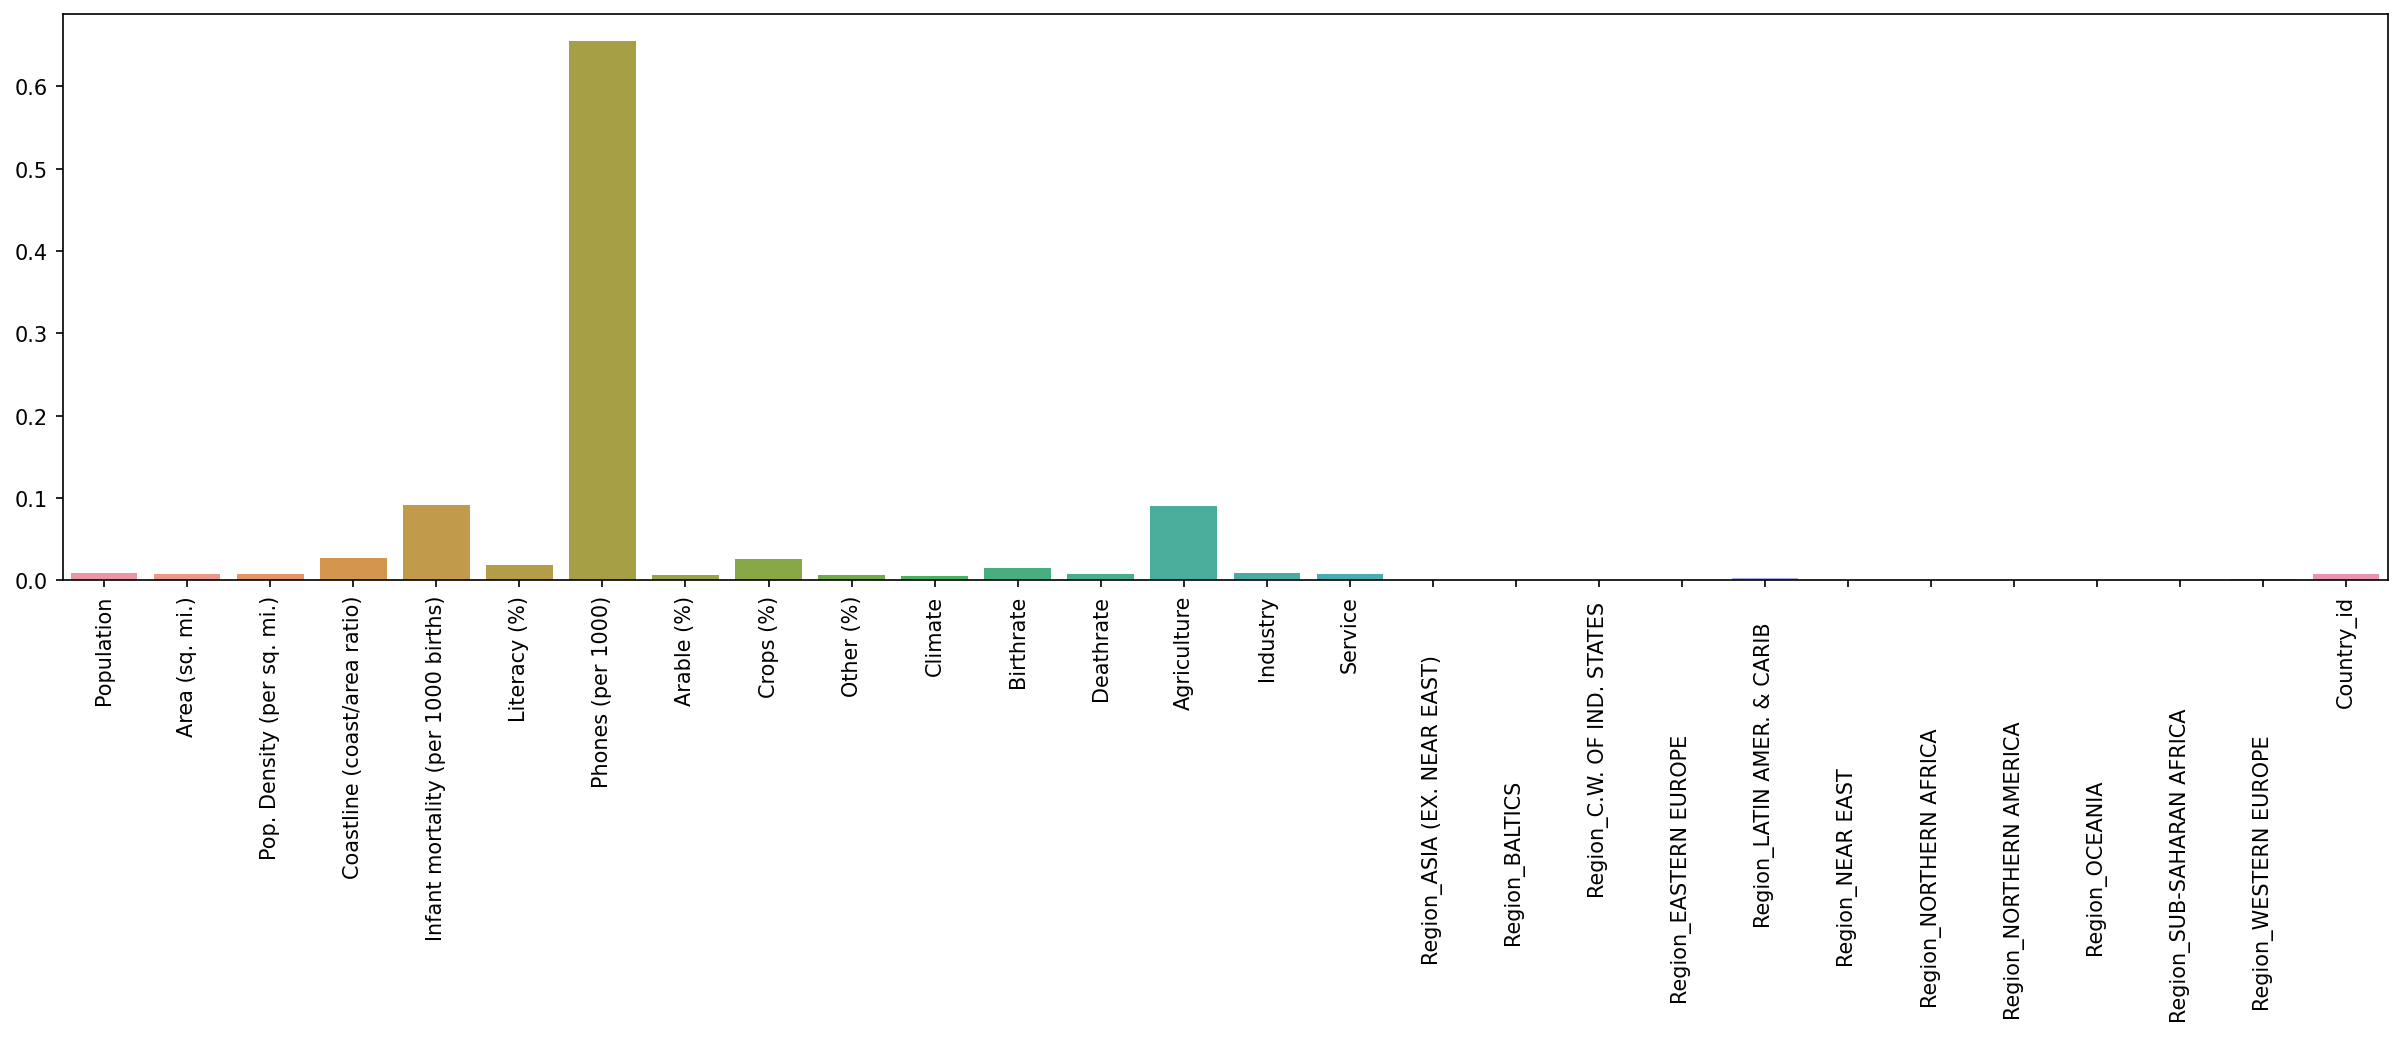

In [23]:
plt.figure(figsize=(20,5),dpi=150)
plt.xticks(rotation=90)
sns.barplot(x=X.columns,y=fi)

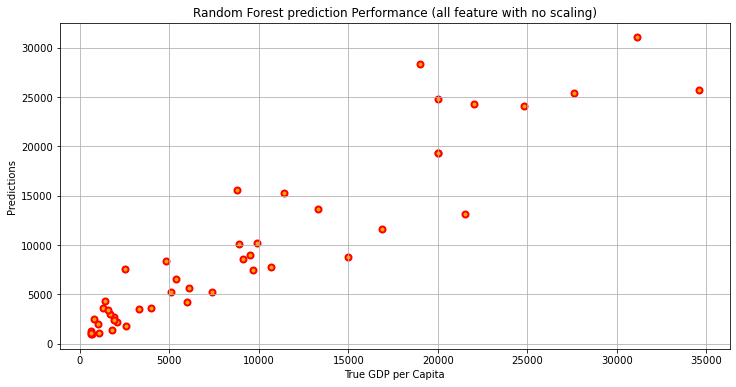

In [24]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf1_pred,color='orange', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance (all feature with no scaling)') 
plt.grid()
plt.show()

In [25]:
sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [26]:
rf2 = RandomForestRegressor(random_state=10, n_estimators=200)
rf2.fit(X2_train,y2_train)

RandomForestRegressor(n_estimators=200, random_state=10)

In [27]:
rf2_pred = rf2.predict(X2_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=rf2_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,1246.5
54,31100.000000,25415.5
185,13300.000000,14195.5
80,20000.000000,20445.5
33,600.000000,1288.0
201,7400.000000,5714.5
37,1400.000000,4913.5
218,4800.000000,9442.0
199,1000.000000,2204.0
66,22000.000000,22979.0


In [60]:
print('Random Forest Performance:')
print('\nall features, with scaling:')
accuracy=rf2.score(X2_test,y2_test)
train=rf2.score(X2_train,y2_train) 
results_df = pd.DataFrame(data=[["random forest perfromance",*evaluate(y2_test, rf2_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Random Forest Performance:

all features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,random forest perfromance,2450.767891,1.323961e+07,3638.627688,0.837819,0.975278,0.837819


In [29]:
fi=np.array(rf2.feature_importances_)
print(fi)

[8.91983921e-03 7.28902198e-03 7.36899714e-03 2.70096180e-02
 9.19103960e-02 1.79941495e-02 6.55080904e-01 5.93134471e-03
 2.53557046e-02 5.95032892e-03 5.27929917e-03 1.43580176e-02
 7.29651672e-03 9.01070377e-02 9.05497247e-03 7.24920977e-03
 1.97313675e-04 4.51671859e-05 2.48002967e-05 2.52846502e-04
 2.76911305e-03 1.45127988e-04 4.39405482e-05 8.56053751e-04
 2.40329017e-04 1.09088730e-04 1.36360738e-03 7.79725476e-03]


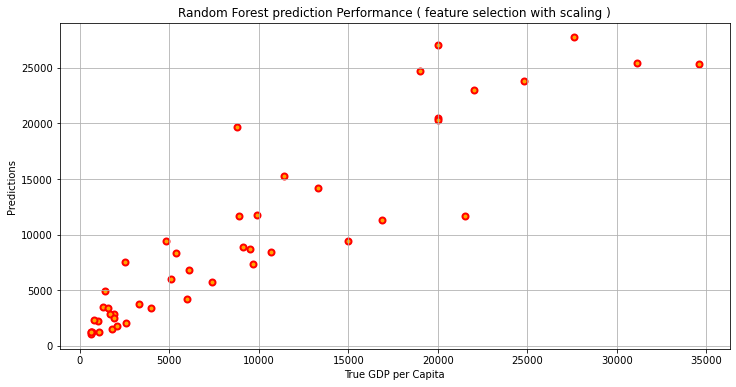

In [31]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,rf2_pred,color='orange', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance ( feature selection with scaling )') 
plt.grid()
plt.show()

In [49]:
y3 = y
X3 = GDP1.drop(['GDP ($ per capita)', 'Arable (%)',
                        'Climate', 'Deathrate',"Industry" ], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101,shuffle=True)

In [50]:
rf3 = RandomForestRegressor(random_state=10, n_estimators=200)
rf3.fit(X3_train, y3_train)

RandomForestRegressor(n_estimators=200, random_state=10)

In [51]:
rf3_pred = rf3.predict(X3_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=rf3_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,1017.0
54,31100.000000,30574.0
185,13300.000000,14068.0
80,20000.000000,17295.0
33,600.000000,1218.0
201,7400.000000,5530.0
37,1400.000000,4425.5
218,4800.000000,8657.5
199,1000.000000,2106.0
66,22000.000000,23557.0


In [61]:
print('Random Forest Performance:')
print('\slected features, No scaling:')
accuracy=rf3.score(X3_test,y3_test)
train=rf3.score(X3_train,y3_train) 
results_df = pd.DataFrame(data=[["random forest perfromance",*evaluate(y_test, rf3_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Random Forest Performance:
\slected features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,random forest perfromance,2136.170065,9.614980e+06,3100.803101,0.88222,0.974414,0.88222


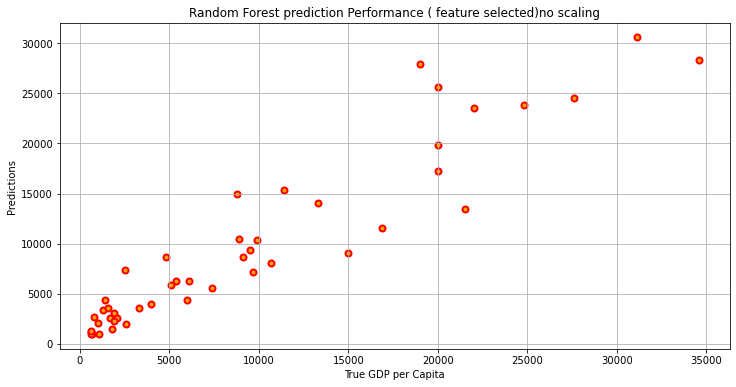

In [53]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,rf3_pred,color='orange', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance ( feature selected)no scaling') 
plt.grid()
plt.show()

In [54]:
sc_X4 = StandardScaler()
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

In [55]:
rf4 = RandomForestRegressor(random_state=10, n_estimators=200)
rf4.fit(X4_train,y4_train)

RandomForestRegressor(n_estimators=200, random_state=10)

In [56]:
rf4_pred = rf4.predict(X4_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=rf4_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,1418.5
54,31100.000000,25045.5
185,13300.000000,15259.5
80,20000.000000,18691.5
33,600.000000,1191.5
201,7400.000000,5824.0
37,1400.000000,5097.5
218,4800.000000,9788.5
199,1000.000000,2438.5
66,22000.000000,22394.0


In [62]:
print('Random Forest Performance:')
print('selected features, with scaling:')
accuracy=rf4.score(X4_test,y4_test)
train=rf4.score(X4_train,y4_train) 
results_df = pd.DataFrame(data=[["random forest perfromance",*evaluate(y_test,rf4_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Random Forest Performance:
selected features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,random forest perfromance,2465.007022,1.200987e+07,3465.526294,0.852883,0.974449,0.852883


In [29]:
fi=np.array(rf4.feature_importances_)
print(fi)

[9.08167427e-03 2.66452047e-02 3.06675264e-02 9.15466763e-02
 1.63608578e-02 6.55328083e-01 2.77345870e-02 8.04192743e-03
 1.69918036e-02 8.75553491e-02 1.06616301e-02 5.90219965e-03
 2.32962477e-04 1.43884218e-04 2.91867603e-05 3.06210522e-04
 2.55793160e-03 2.12800585e-04 7.48146823e-05 5.72508180e-04
 3.75720390e-04 1.58311781e-04 7.24748033e-04 8.09340167e-03]


<AxesSubplot:>

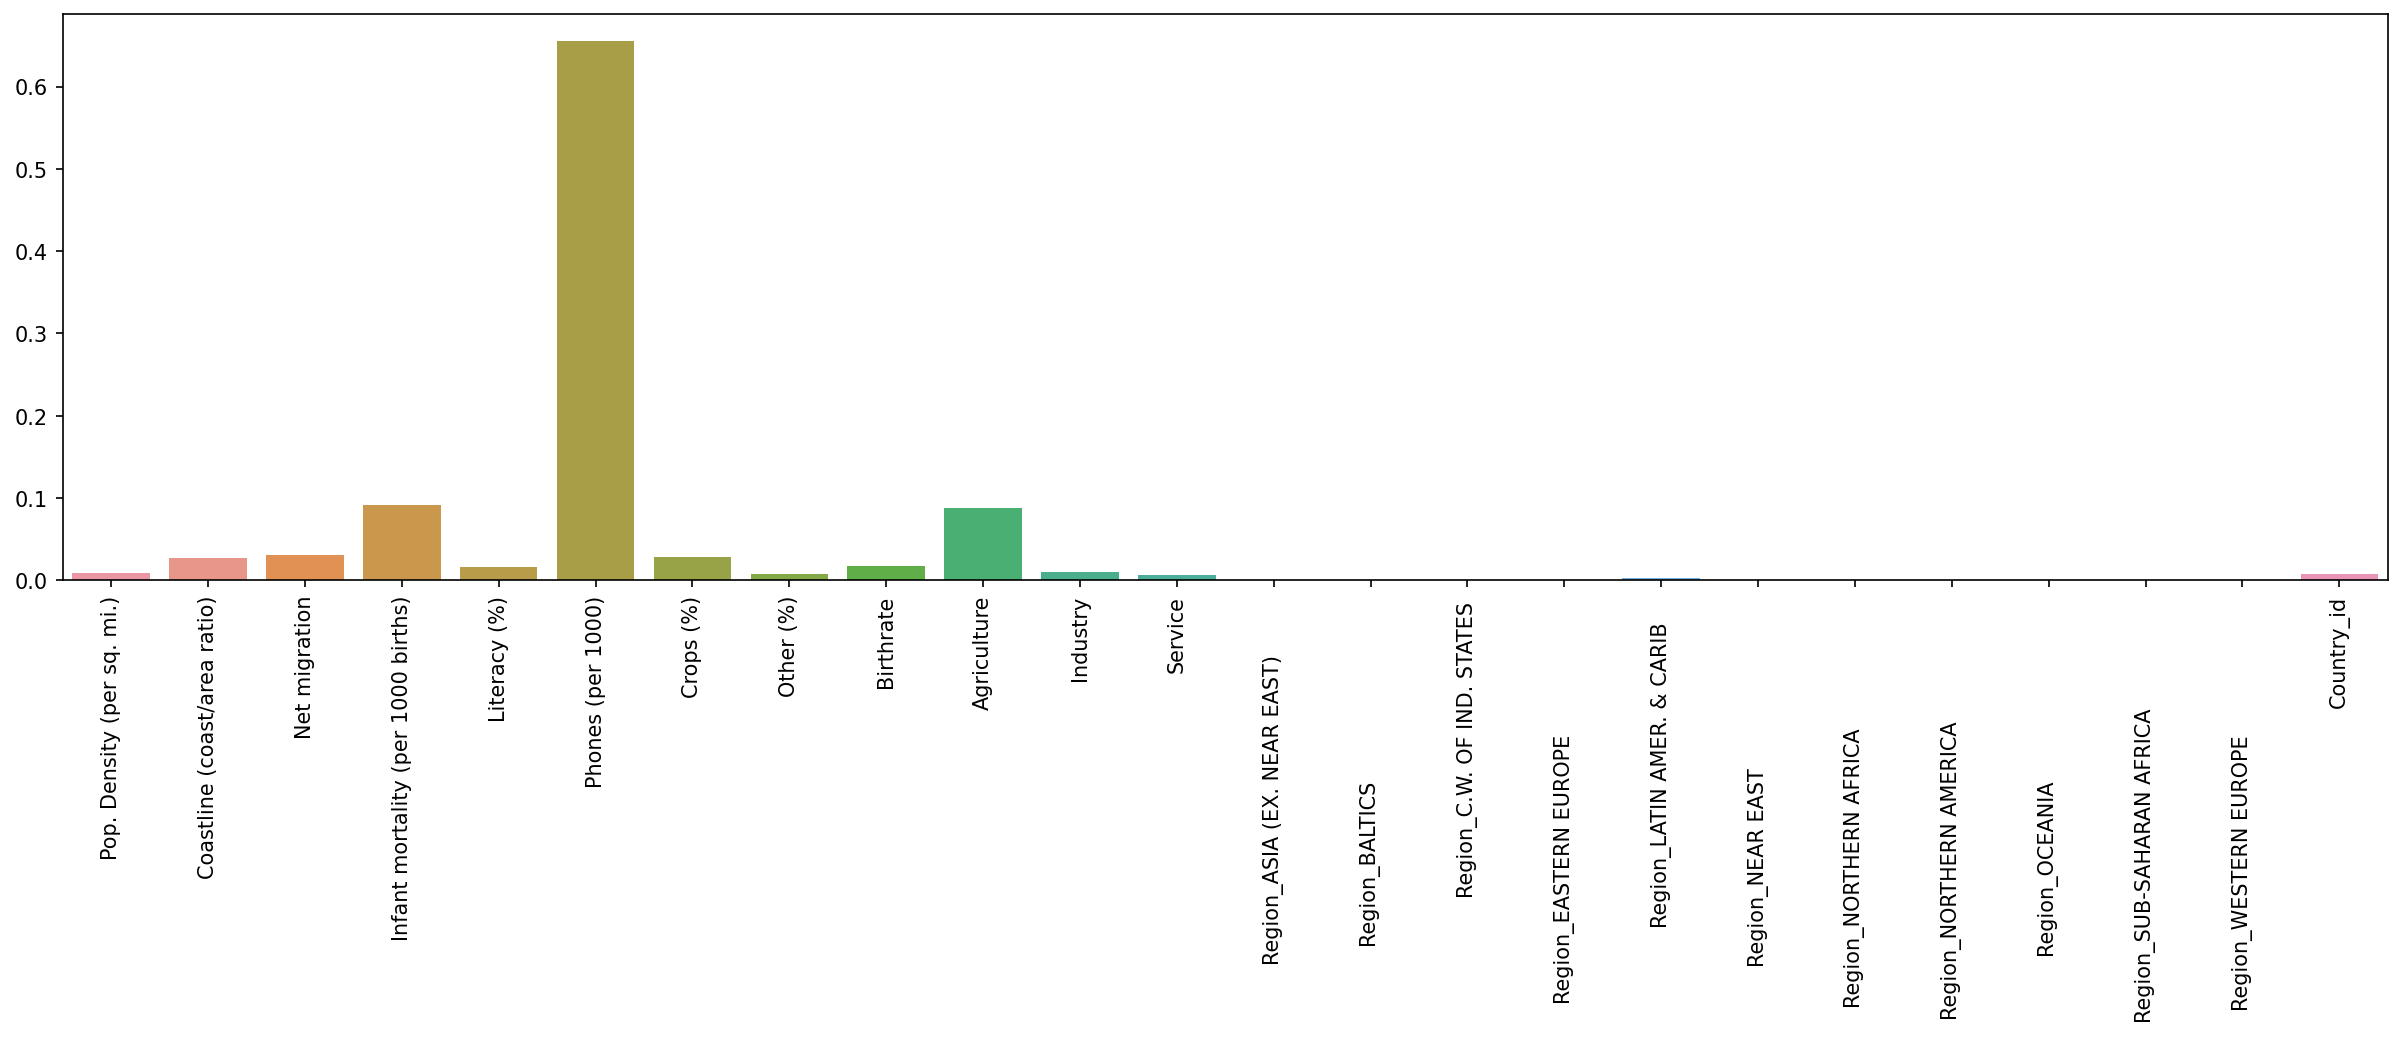

In [30]:
plt.figure(figsize=(20,5),dpi=150)
plt.xticks(rotation=90)
sns.barplot(x=X3.columns,y=fi)

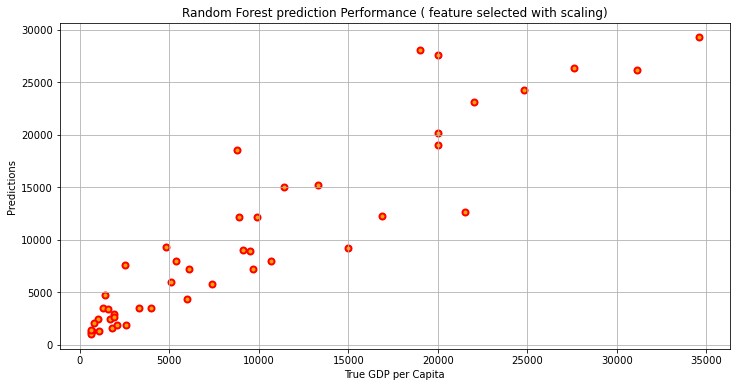

In [31]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,rf4_pred,color='orange', linewidths=2, edgecolors='red')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance ( feature selected with scaling)') 
plt.grid()
plt.show()

# working of joblib file

In [32]:
Final_file_SVM = RandomForestRegressor(random_state=10, n_estimators=200)

In [33]:
Final_file_SVM.fit(X,y)

RandomForestRegressor(n_estimators=200, random_state=10)

In [34]:
dump(Final_file_SVM,'GDP_per_capita.joblib')

['GDP_per_capita.joblib']

In [35]:
predictor_SVM=load('GDP_per_capita.joblib')

In [36]:
X.loc[0]

Population                                    31056997.00
Area (sq. mi.)                                  647500.00
Pop. Density (per sq. mi.)                          48.00
Coastline (coast/area ratio)                         0.00
Net migration                                       23.06
Infant mortality (per 1000 births)                 163.07
Literacy (%)                                        36.00
Phones (per 1000)                                    3.20
Arable (%)                                          12.13
Crops (%)                                            0.22
Other (%)                                           87.65
Climate                                              1.00
Birthrate                                           46.60
Deathrate                                           20.34
Agriculture                                          0.38
Industry                                             0.24
Service                                              0.38
Region_ASIA (E

In [37]:
predictor_SVM.predict([[31056997.00,647500.00,48.00,0.00,23.06,163.07,36.00,3.20,12.13,0.22,87.65,1.00,46.60,20.34,0.38,0.24,0.38,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]])

array([865.5])